## Idea: More men use citibikes than women, but is ratio of male to female riders different based on the time of day?

**Alternative hypothese**: The ratio of female to male riders in the evening (4 to 7 pm) (P1) is greater than the ratio of female to male riders in the morning (7 to 10 am) (P0).
Ha = P1 > P0

**NULL hypothesis**: The ratio of female to male riders in the evening (4 to 7 pm) is less than or equal to the ratio of female to male riders in the morning (7 to 10 am). p = 0.05
Ho = P1 < = P0



In [64]:
from __future__ import print_function
import os
import numpy as np
import pandas as pd
import zipfile
from getCitiBikeCSV import getCitiBikeCSV
import pylab as pl
%pylab inline

from evalChisq import evalChisq

import csv
import requests


Populating the interactive namespace from numpy and matplotlib


In [2]:
from getCitiBikeCSV import getCitiBikeCSV

In [3]:
datestring = '201501'
getCitiBikeCSV(datestring)

('Downloading', '201501')
WARNING!!! something is wrong: the file is not there!


In [9]:
datestring = '201502'
!curl -O "https://s3.amazonaws.com/tripdata/{datestring}-citibike-tripdata.zip"

#https://discuss.analyticsvidhya.com/t/how-to-read-zip-file-directly-in-python/1659
zf = zipfile.ZipFile(datestring+'-citibike-tripdata.zip')
df = pd.read_csv(zf.open(datestring+'-citibike-tripdata.csv'))

df.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4708k  100 4708k    0     0  8089k      0 --:--:-- --:--:-- --:--:-- 11.4M


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1


In [10]:
df['date'] = pd.to_datetime(df['starttime'])

In [11]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [12]:
df.drop([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year'], axis=1, inplace=True)

In [13]:
df.head()

,gender,date
0,2,2015-02-01 00:00:00
1,1,2015-02-01 00:00:00
2,2,2015-02-01 00:01:00
3,2,2015-02-01 00:01:00
4,1,2015-02-01 00:01:00


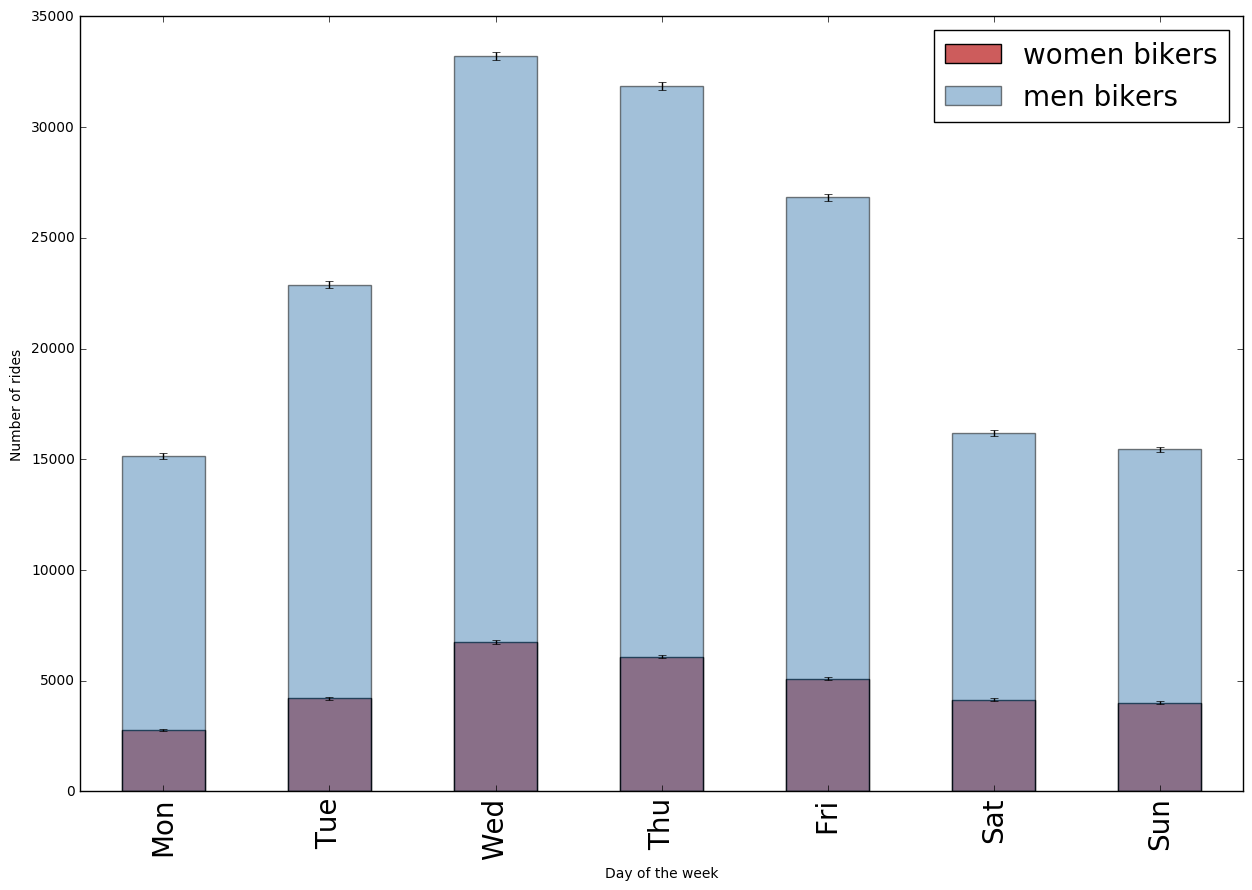

In [15]:
fig=pl.figure(figsize(15,10))

counts_w = df.date[df.gender == 2].groupby([df.date.dt.weekday]).count()
norm_w = 1
error_w = np.sqrt(counts_w)
ax=((counts_w) / norm_w).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_w) / norm_w, (error_w) / norm_w)], label='women bikers')


counts_m = df.date[df.gender==1].groupby([df.date.dt.weekday]).count()
norm_m = 1
error_m=np.sqrt(counts_m)
((counts_m) / norm_m).plot(kind="bar", alpha=0.5, yerr=[((error_m) / norm_m, (error_m) / norm_m)], 
                           color='SteelBlue', label='men bikers')
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Day of the week")
pl.legend(['women bikers','men bikers'],fontsize=20)

## Figure 1: Distribution of Citibike bikers by gender in February 2015, absolute counts, with statistical errors

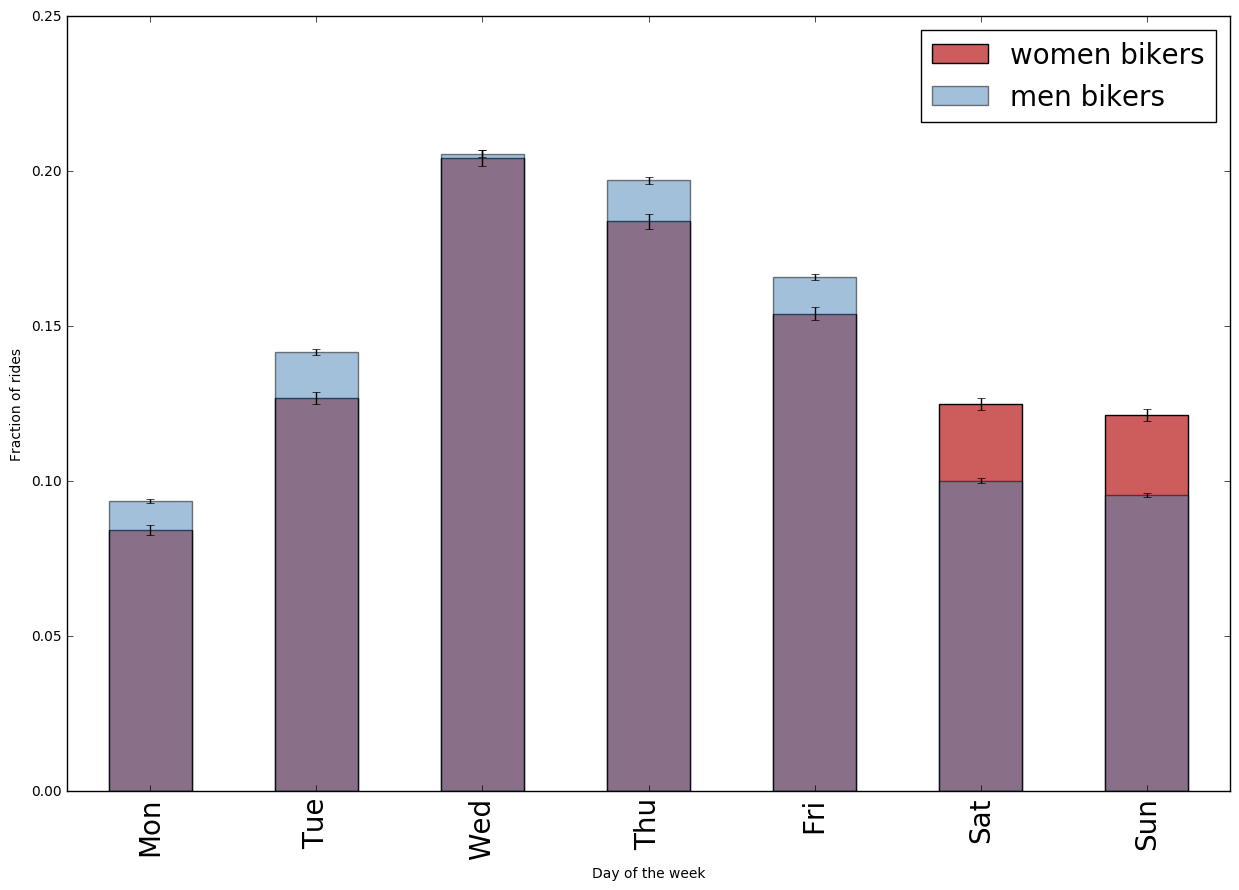

In [16]:
fig = pl.figure(figsize(15,10))

norm_w = counts_w.sum()
error_w = np.sqrt(counts_w)
((counts_w) / norm_w).plot(kind="bar", color='IndianRed',  
                           yerr=[((error_w) / norm_w, (error_w) / norm_w)], 
                           label='women bikers')

norm_m = counts_m.sum()
ax = ((counts_m) / norm_m).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_m) / norm_m, (error_m) / norm_m)], 
                                color='SteelBlue', label='men bikers')

ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Day of the week")

pl.legend(['women bikers','men bikers'],fontsize=20)

## Figure 2: Distribution of Citibike bikers by gender in February 2015, normalized

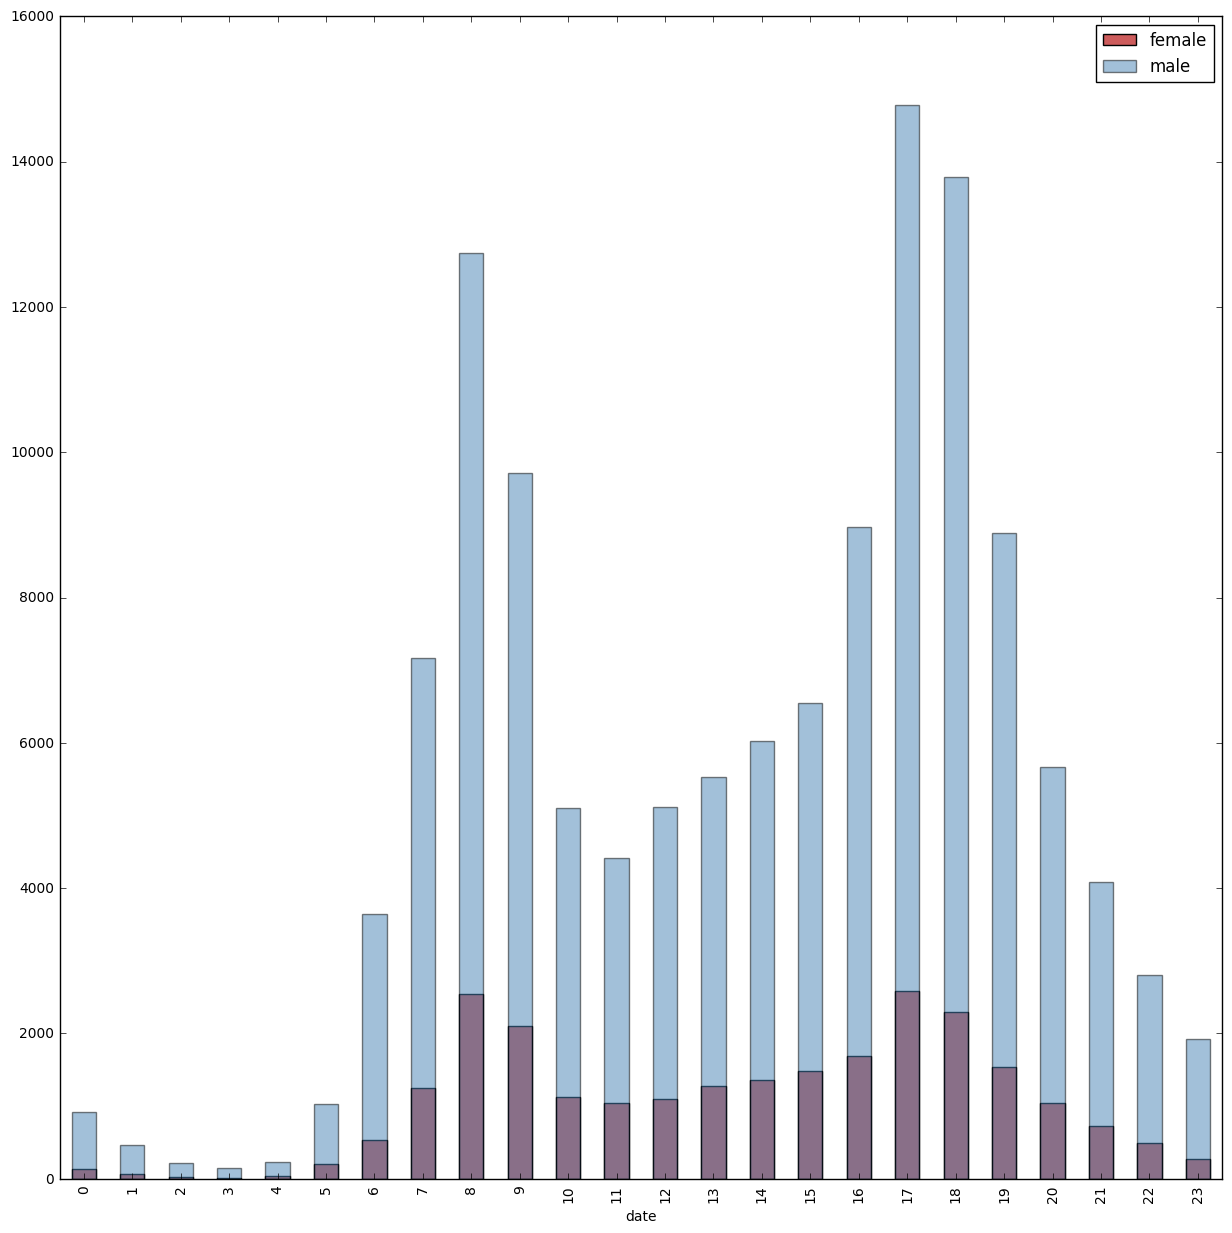

In [128]:
fig = pl.figure(figsize(15,15))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_w = 1
((df['date'][df['gender'] == 2][df.date.dt.weekday < 5].groupby([df.date.dt.hour]).count()) / norm_w).plot(kind="bar", 
                                                                                         color='IndianRed', 
                                                                                         label='female')

norm_m = 1
ax = ((df['date'][df['gender'] == 1][df.date.dt.weekday < 5].groupby([df.date.dt.hour]).count()) / norm_m).plot(kind="bar", 
                                                                                              color='SteelBlue', 
                                                                                              alpha=0.5,
                                                                                              label='male')

#[df.date.dt.hour >= 7][df.date.dt.hour <= 10]
#tmp = ax.xaxis.set_ticklabels(['Mo', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
pl.legend()

## Figure 3: Distribution of rides by gender across hours, during weekdays only, absolute counts, February 2015. 

In [152]:
morn_m_count = df.date[df.date.dt.hour >= 7][df.date.dt.hour <= 10][df.gender == 1][df.date.dt.weekday < 5].groupby([df.date.dt.hour]).count()
morn_f_count = df.date[df.date.dt.hour >= 7][df.date.dt.hour <= 10][df.gender == 2][df.date.dt.weekday < 5].groupby([df.date.dt.hour]).count()
eve_m_count = df.date[df.date.dt.hour >= 16][df.date.dt.hour <= 19][df.gender == 1][df.date.dt.weekday < 5].groupby([df.date.dt.hour]).count()
eve_f_count = df.date[df.date.dt.hour >= 16][df.date.dt.hour <= 19][df.gender == 2][df.date.dt.weekday < 5].groupby([df.date.dt.hour]).count()

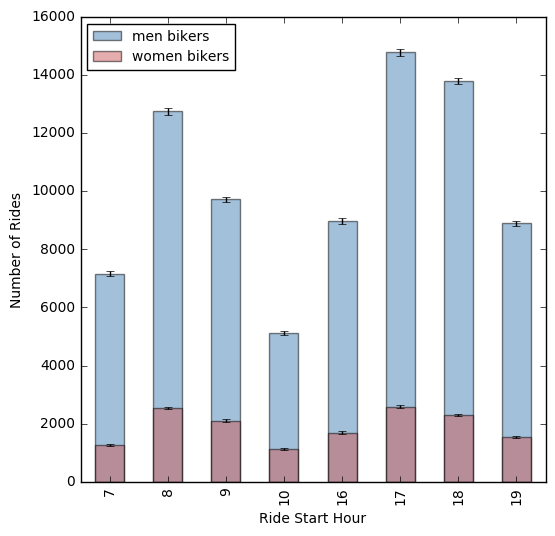

In [216]:
fig=pl.figure(figsize(6,6))

fem = pd.concat([morn_f_count, eve_f_count])
mal = pd.concat([morn_m_count, eve_m_count])


norm_m = 1
error_m =np.sqrt(mal)
(((mal) / norm_m).plot(kind="bar", alpha=0.5, yerr=[((error_m) / norm_m, (error_m) / norm_m)], 
                           color='SteelBlue', label='men bikers'))

norm_w = 1
error_w = np.sqrt(fem)
((fem) / norm_w).plot(kind="bar",color='IndianRed', alpha=0.5,  yerr=[
            ((error_w) / norm_w, (error_w) / norm_w)], label='women bikers')


#ax.xaxis.set_ticklabels([7, 8, 9, 10, 16, 17, 18, 19], fontsize=10)
pl.ylabel ("Number of Rides")
pl.xlabel ("Ride Start Hour")
pl.legend(fontsize=10, loc='upper left')

## Figure 4: Morning and Evening rides by gender, absolute counts, February 2015.  

In [152]:
morn_m_count = df.date[df.date.dt.hour >= 7][df.date.dt.hour <= 10][df.gender == 1][df.date.dt.weekday < 5].groupby([df.date.dt.hour]).count()
morn_f_count = df.date[df.date.dt.hour >= 7][df.date.dt.hour <= 10][df.gender == 2][df.date.dt.weekday < 5].groupby([df.date.dt.hour]).count()
eve_m_count = df.date[df.date.dt.hour >= 16][df.date.dt.hour <= 19][df.gender == 1][df.date.dt.weekday < 5].groupby([df.date.dt.hour]).count()
eve_f_count = df.date[df.date.dt.hour >= 16][df.date.dt.hour <= 19][df.gender == 2][df.date.dt.weekday < 5].groupby([df.date.dt.hour]).count()

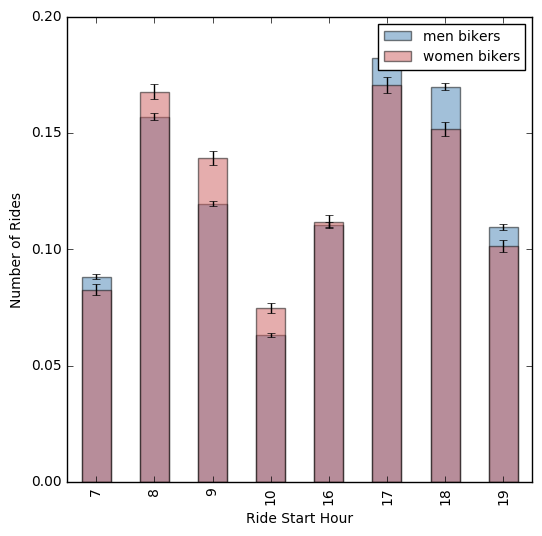

In [217]:
fig=pl.figure(figsize(6,6))

norm_m = mal.sum()
error_m =np.sqrt(mal)
(((mal) / norm_m).plot(kind="bar", alpha=0.5, yerr=[((error_m) / norm_m, (error_m) / norm_m)], 
                           color='SteelBlue', label='men bikers'))

norm_w = fem.sum()
error_w = np.sqrt(fem)
((fem) / norm_w).plot(kind="bar",color='IndianRed', alpha=0.5,  yerr=[
            ((error_w) / norm_w, (error_w) / norm_w)], label='women bikers')


#ax.xaxis.set_ticklabels([7, 8, 9, 10, 16, 17, 18, 19], fontsize=10)
pl.ylabel ("Number of Rides")
pl.xlabel ("Ride Start Hour")
pl.legend(fontsize=10, loc='upper right')

# Figure 5: Distribution of morning and evening Citibike rides by gender, normalized, February 2015. 

In [201]:
print ('Morning, F: ', morn_f_count.sum(), '\n', 'Morning, M: ', morn_m_count.sum(),'\n',\
       'Evening, F: ', eve_f_count.sum(), '\n', 'Evening, M: ', eve_m_count.sum(),'\n', '\n',\
      'Morning Total: ', morn_f_count.sum()+morn_m_count.sum(), '\n', 'Evening Total: ', \
       eve_f_count.sum()+eve_m_count.sum(),'\n', '\n', 'Female Total: ', morn_f_count.sum()+eve_f_count.sum(),'\n',\
      'Male Total: ', morn_m_count.sum()+eve_m_count.sum(), '\n', '\n', 'Total: ', eve_f_count.sum()+eve_m_count.sum()+\
      morn_f_count.sum()+morn_m_count.sum(), morn_m_count.sum()+eve_m_count.sum()+morn_f_count.sum()+eve_f_count.sum(), '\n', '\n',)

print ('Estimated Values', '\n', 'Morning, F: ', 15122*41756/96299, '\n', 'Morning, M: ', 81177*41756/96299,'\n',\
       'Evening, F: ', 15122*54543/96299, '\n', 'Evening, M: ', 81177*54543/96299)

Morning, F:  7022 
 Morning, M:  34734 
 Evening, F:  8100 
 Evening, M:  46443 
 
 Morning Total:  41756 
 Evening Total:  54543 
 
 Female Total:  15122 
 Male Total:  81177 
 
 Total:  96299 96299 
 

Estimated Values 
 Morning, F:  6557 
 Morning, M:  35198 
 Evening, F:  8564 
 Evening, M:  45978


 |                           |     Morning           | Evening          |                     |
|---------------------------|:---------------------:|------------------|---------------------|
| Female                      | 7022 (6557)         | 8100 (8564)    | 15122               |
| Male                    | 34734 (35198)           | 46443 (45978)    | 81177              |
|                           |                       |                  |                     |   
| total                     | 41756                 | 54543           |  96299             |

In [208]:
sample_values = np.array([[7022, 8100], [34734 , 46443]])
chisq = evalChisq(sample_values)
DOF = len(sample_values) - 1
print ('chi sq statistics": '+
       'chisq = {:.3f}, DOF = {:d}'.format(chisq, DOF))

chimin_alpha5pc = 3.84
print ("The Null hypothesis that there is no difference in the proporation of female and male riders based on time",\
       "of commmute measured as: the number of female and male riders in morning and evening ")
if chisq > chimin_alpha5pc :
    print ("can be rejected at alpha = 0.05")
else: 
    print ("cannot be rejected (p<0.05)")
print ("with a chi square statistics of %.2f"%chisq )

chi sq statistics": chisq = 67.000, DOF = 1
The Null hypothesis that there is no difference in the proporation of female and male riders based on time of commmute measured as: the number of female and male riders in morning and evening 
can be rejected at alpha = 0.05
with a chi square statistics of 67.00


In [212]:
34734.0/7022

4.946454001708915

In [213]:
46443.0/8100

5.7337037037037035

In [214]:
8100.0/7022

1.1535175163771005

In [215]:
46443.0/34734

1.3371048540335118

#### 

### The below cells are from an earlier analysis that I redid above. I did not want to lose this work, so I saved it below.  Please ignore.

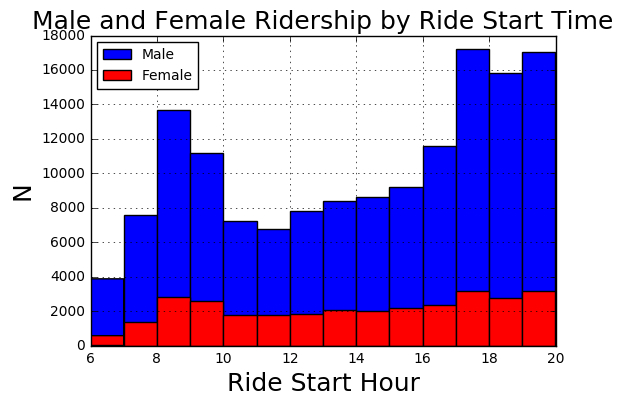

In [111]:
(df['starthourint'][df['gender'] == 1]).hist(bins=(6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20), label = "Male", color='b')
(df['starthourint'][df['gender'] == 2]).hist(bins=(6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20), label = "Female", color='r')
pl.title('Male and Female Ridership by Ride Start Time', fontsize=18)
pl.xlabel('Ride Start Hour', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.legend(fontsize = 10, loc='upper left')

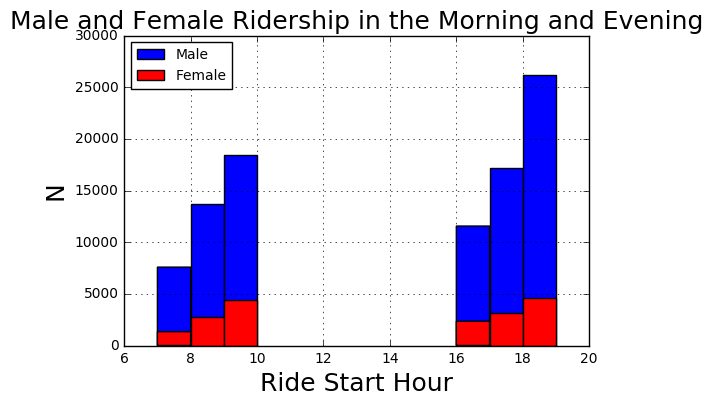

In [112]:
(df['starthourint'][df['gender'] == 1]).hist(bins=(7, 8, 9, 10), label = "Male", color='b')
(df['starthourint'][df['gender'] == 2]).hist(bins= (7, 8, 9, 10), label = "Female", color='r')
(df['starthourint'][df['gender'] == 1]).hist(bins=(16, 17, 18, 19), color='b')
(df['starthourint'][df['gender'] == 2]).hist(bins= (16, 17, 18, 19), color='r')
#histogram code from Christian Rosado
pl.title('Male and Female Ridership in the Morning and Evening', fontsize=18)
pl.xlabel('Ride Start Hour', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.legend(fontsize = 10, loc='upper left')

In [203]:
from evalChisq import evalChisq

In [87]:
male_eve = len(df[df['evening'] == True][df['gender'] == 1])
female_eve = len(df[df['evening'] == True][df['gender'] == 2])
eve_tot = male_eve + female_eve
print ('Evening_total: ', eve_tot, '\n','Evening Male: ', male_eve, '\n', 'Evening Females: ', female_eve)

Evening_total:  65093 
 Evening Male:  54942 
 Evening Females:  10151


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [86]:
male_morn = len(df[df['morning'] == True][df['gender'] == 1])
female_morn = len(df[df['morning'] == True][df['gender'] == 2])
morn_tot = male_morn + female_morn
print ('Morning total: ', morn_tot, '\n','Morning Male: ', male_morn, '\n', 'Morning Females: ', female_morn)

Morning total:  48205 
 Morning Male:  39698 
 Morning Females:  8507


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


|                           |     Morning           | Evening          |                     |
|---------------------------|:---------------------:|------------------|---------------------|
| Male                      | 39698 (40266)         | 54942 (54373)    | 94640               |
| Female                    | 8507 (7938)           | 10151 (10719)    | 18658               |
|                           |                       |                  |                     |   
| total                     | 48205                 | 65093            |  113298             |

In [100]:
sample_values = np.array([[39698, 54942], [8507, 10151]])
chisq = evalChisq(sample_values)
DOF = len(sample_values) - 1
print ('chi sq statistics": '+
       'chisq = {:.3f}, DOF = {:d}'.format(chisq, DOF))

chi sq statistics": chisq = 83.000, DOF = 1


In [101]:
chimin_alpha5pc = 3.84
print ("The Null hypothesis that there is no difference in the proporation of female and male riders based on time of commmute, ")
print ("measured as: the number of female and male riders in morning and evening ")
if chisq > chimin_alpha5pc :
    print ("can be rejected at alpha = 0.05")
else: 
    print ("cannot be rejected (p<0.05)")
print ("with a chi square statistics of %.2f"%chisq )

The Null hypothesis that there is no difference in the proporation of female and male riders based on time of commmut, 
measured as: the number of female and male riders in morning and evening 
can be rejected at alpha = 0.05
with a chi square statistics of 83.00


In [103]:
(male_morn *1.0) / female_morn

4.666509932996356

In [104]:
(male_eve * 1.0) / female_eve

5.412471677667225

In [106]:
male_eve/ (male_morn *1.0)

1.383999193914051

In [109]:
female_eve/ (female_morn * 1.0)

1.1932526154931233